In [ ]:
import pandas as pd

%pip install wget

import wget
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
wget.download(url, 'grades.csv')

df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(14, 5))

plt.bar(x=df_students.Name, height=df_students.Grade, color = 'blue')

plt.title('Student Grades')
plt.xlabel('Names')
plt.ylabel('Grades')
plt.xticks(rotation=90)

plt.show()

In [25]:
passed = pd.Series(df_students.Grade > 60)
df_students = pd.concat([df_students, passed.rename('Passed')], axis=1)

df_students

,Name,StudyHours,Grade,Passed,Passed
0,Dan,10.00,50.0,False,False
1,Joann,11.50,50.0,False,False
2,Pedro,9.00,47.0,False,False
3,Rosie,16.00,97.0,True,True
4,Ethan,9.25,49.0,False,False
5,Vicky,1.00,3.0,False,False
6,Frederic,11.50,53.0,False,False
7,Jimmie,9.00,42.0,False,False
8,Rhonda,8.50,26.0,False,False
9,Giovanni,14.50,74.0,True,True


In [ ]:
# Drop the duplicate 'Passed' column
df_students = df_students.loc[:, ~df_students.columns.duplicated()]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color = 'blue')
ax[0].set_title('Student Grades')
ax[0].set_xticks(range(len(df_students.Name)))
ax[0].set_xticklabels(df_students.Name, rotation=90)

passes_count = df_students.Passed.value_counts()
ax[1].pie(passes_count, labels=passes_count.index)
ax[1].set_title('Passing Grades')

plt.show()


<Axes: title={'center': 'Student Grades'}, xlabel='Name'>

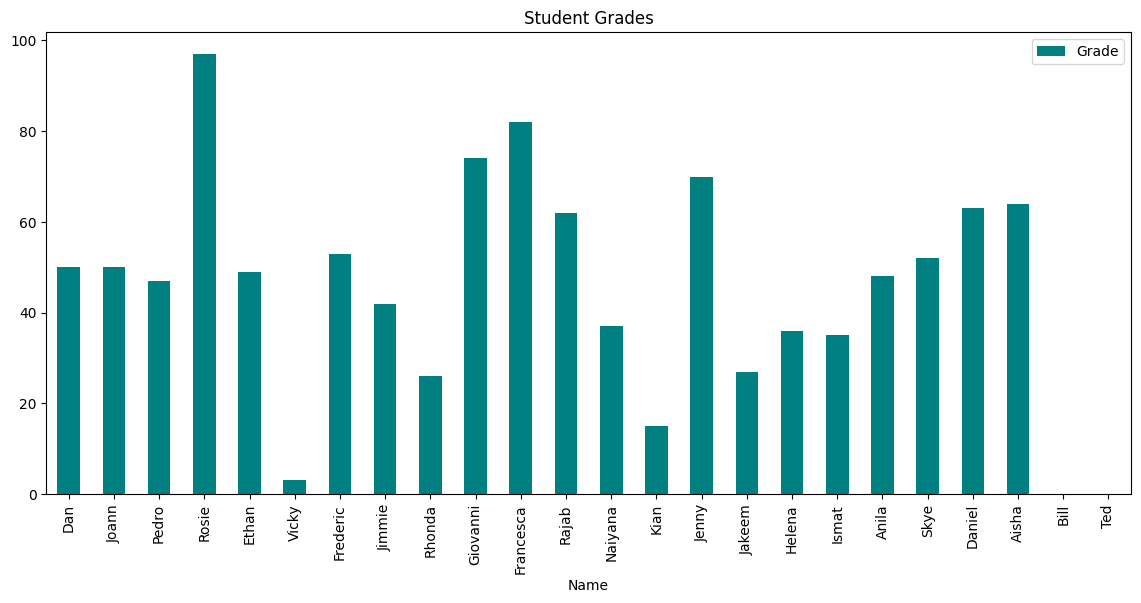

In [33]:
df_students.plot.bar(x='Name', y= 'Grade', figsize=(14, 6), color='teal', rot=90, title='Student Grades')